# EDA + 데이터 파악 파트

## R에서 전반적인 EDA를 실시하였음.

특이점이나 데이터의 분포, 그래프는 R 마크다운 파일을 참조하면 좋고
아래 코드는 파이썬에서 파악한 결측값과 요약 통계을 표시한다.

## 기초 모듈 임포트

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib as plt

## 데이터셋 임포트, 데이터 체크
데이터의 형태는 아래와 같이 구성되어진다.

In [2]:
os.chdir(r'C:\Users\styli\Desktop\데이콘 프로젝트\동아리 pj-펭귄\dataset')
train = pd.read_csv('train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   114 non-null    int64  
 1   Species              114 non-null    object 
 2   Island               114 non-null    object 
 3   Clutch Completion    114 non-null    object 
 4   Culmen Length (mm)   114 non-null    float64
 5   Culmen Depth (mm)    114 non-null    float64
 6   Flipper Length (mm)  114 non-null    int64  
 7   Sex                  111 non-null    object 
 8   Delta 15 N (o/oo)    111 non-null    float64
 9   Delta 13 C (o/oo)    111 non-null    float64
 10  Body Mass (g)        114 non-null    int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 9.9+ KB


read_csv로 불러온 경우 무의미한 id행이 포함되어 있다. id행을 제거한다.
또한 결측값이 존재하는 행이 존재함을 확인하였다.

.info() 의 결과 행의 개수와 non-null의 개수가 다름을 통해 빠르게 파악 가능하다.

In [3]:
train = train.drop("id",axis=1)
# 결측값 있는 열 값 확인
nacell = train[train.isna().sum(axis=1) > 0]

팀의 EDA결과, -> EDA R로 한 파일에도 존재함. Rmd 파일을 참고하자.
결측값이 등장하는 범주의 통계량은 다음과 같다.

In [4]:
print(train.loc[:,'Sex'].describe())
# print(train.loc[:,'Sex'].value_counts())
# Sex의 최빈은 MAlE

count      111
unique       2
top       MALE
freq        56
Name: Sex, dtype: object


In [5]:
print(train.loc[:,'Delta 15 N (o/oo)'].describe())
# delta 15의 평균은 8.73.... 해당연산값

count    111.000000
mean       8.737634
std        0.567698
min        7.632200
25%        8.272585
50%        8.632590
75%        9.264635
max       10.025440
Name: Delta 15 N (o/oo), dtype: float64


In [6]:
print(train.loc[:,'Delta 13 C (o/oo)'].describe())

count    111.000000
mean     -25.723051
std        0.859786
min      -27.018540
25%      -26.434025
50%      -25.955410
75%      -25.005945
max      -24.102550
Name: Delta 13 C (o/oo), dtype: float64


먼저 결측값은 평균으로 처리하였다.
train셋의 평균값으로, train셋, test셋에게 동등한 처리를 진행하였다.

In [7]:
# 결측값 처리

train.loc[:,'Delta 15 N (o/oo)'] = train.loc[:,'Delta 15 N (o/oo)'].fillna(train.loc[:,'Delta 15 N (o/oo)'].mean())
train.loc[:,'Delta 13 C (o/oo)'] = train.loc[:,'Delta 13 C (o/oo)'].fillna(train.loc[:,'Delta 13 C (o/oo)'].mean())
# train[train.isna().sum(axis=1) > 0]
train.info() # 결측값 더이상 없음 확인 -> rangeidx 114 = 모든 요소 114 non-null으로 확인됨.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              114 non-null    object 
 1   Island               114 non-null    object 
 2   Clutch Completion    114 non-null    object 
 3   Culmen Length (mm)   114 non-null    float64
 4   Culmen Depth (mm)    114 non-null    float64
 5   Flipper Length (mm)  114 non-null    int64  
 6   Sex                  111 non-null    object 
 7   Delta 15 N (o/oo)    114 non-null    float64
 8   Delta 13 C (o/oo)    114 non-null    float64
 9   Body Mass (g)        114 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 9.0+ KB


또한 테스트에서 사용할 test셋도 임포트 후 준비시켜 준다.

In [8]:
# 테스트셋 미리 확인.
test = pd.read_csv('test.csv')
test = test.drop("id",axis=1)

test.info()
# test에서도, sex, delta15, delta 13에서만 결측 발생중. id행 무쓸모 함.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              228 non-null    object 
 1   Island               228 non-null    object 
 2   Clutch Completion    228 non-null    object 
 3   Culmen Length (mm)   228 non-null    float64
 4   Culmen Depth (mm)    228 non-null    float64
 5   Flipper Length (mm)  228 non-null    float64
 6   Sex                  222 non-null    object 
 7   Delta 15 N (o/oo)    219 non-null    float64
 8   Delta 13 C (o/oo)    220 non-null    float64
dtypes: float64(5), object(4)
memory usage: 16.2+ KB


In [9]:
# 결측값 처리-test셋은 train셋 값으로 동일하게 실시

test.loc[:,'Delta 15 N (o/oo)'] = test.loc[:,'Delta 15 N (o/oo)'].fillna(train.loc[:,'Delta 15 N (o/oo)'].mean())
test.loc[:,'Delta 13 C (o/oo)'] = test.loc[:,'Delta 13 C (o/oo)'].fillna(train.loc[:,'Delta 13 C (o/oo)'].mean())


#test[test.isna().sum(axis=1) > 0]
test.info() # 결측값 더이상 없음 확인 -> rangeidx 228 = 모든 요소 228 non-null으로 확인됨.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              228 non-null    object 
 1   Island               228 non-null    object 
 2   Clutch Completion    228 non-null    object 
 3   Culmen Length (mm)   228 non-null    float64
 4   Culmen Depth (mm)    228 non-null    float64
 5   Flipper Length (mm)  228 non-null    float64
 6   Sex                  222 non-null    object 
 7   Delta 15 N (o/oo)    228 non-null    float64
 8   Delta 13 C (o/oo)    228 non-null    float64
dtypes: float64(5), object(4)
memory usage: 16.2+ KB


단순히 최빈값으로 결측값을 처리하는것보다 더 좋은 처리방안이 존재하는데
다른 변수와의 연관관계를 생각하여 처리하는 방법이다.

하지만 EDA방법론의 부족탓인지 직관적으로 떠오르지 않아.(5변수 중에 완전히 범주가 갈리는 변수는 존재하지 않기 때문) KNN-imputer를 통해 유사한 값을 탐색, 대체하는 모듈을 사용해 처리를 진행하였다.

먼저 KNN-imputer는 모든 입력을 수치형으로 받는다. 따라서 라벨 인코딩을 수동으로 실시하여 주었다.
(NA값을 na값으로 두는 인코딩이 필요하기에 labelencoder를 사용하지 않았다.

In [10]:
# 명목형 변수는 수치형 라벨로 코딩필요. 이 경우 mapping을 이용한 값의 처리, NA값은 NA로만 표기 되었으므로, 변경할 필요가 없음.
# 라벨 코딩을 위해 아래 파악은 필수.
train['Species'].value_counts()
train['Island'].value_counts()
train['Clutch Completion'].value_counts()
train['Sex'].value_counts()

# train셋과 test셋의 가지는 명목형 변수의 범주는 아래와 같이 동일하다.
idx_species = {'Gentoo penguin (Pygoscelis papua)' : 0, 'Adelie Penguin (Pygoscelis adeliae)' : 1,  'Chinstrap penguin (Pygoscelis antarctica)' : 2}
idx_island = {'Biscoe' : 0, 'Dream' : 1, 'Torgersen' : 2}
idx_clutch = {'Yes' : 0, 'No' : 1}
idx_sex = {'MALE' : 0, 'FEMALE' : 1}

# 라벨링과정 실시, NA를 살려야하기 때문에 labelencoder를 사용하지 않았다.
train['Species'] = train['Species'].map(idx_species)
train['Island'] = train['Island'].map(idx_island)
train['Clutch Completion'] = train['Clutch Completion'].map(idx_clutch)
train['Sex'] = train['Sex'].map(idx_sex)

# test셋에 대해서도 동등하게 매핑 실시.
test['Species'] = test['Species'].map(idx_species)
test['Island'] = test['Island'].map(idx_island)
test['Clutch Completion'] = test['Clutch Completion'].map(idx_clutch)
test['Sex'] = test['Sex'].map(idx_sex)



이렇게 범주형 변수들에 대해 매핑을 통한 라벨 인코딩을 실시한 뒤
KNNImputer를 사용하여 Sex 열에 대한 결측값 처리를 진행하였다.

In [11]:
# KNN을 Sex행에 대해 적용해보자.
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 1) 
# KNN 기준 n_neighbors = 이웃 파라미터, 디폴트값이 5임. 
# 예를들어 5를 쓰는데 Na값의 이웃으로 해당값과 유사한, 0,0,0,1,1 이라는 Sex의 이웃 KNN에 포함될경우 이들의 평균인 0.4로 예측하게 된다.
# 따라서 우리는 가장 비슷한 예제로 채우고 싶기 때문에 n_neighbor = 1을 사용하였다.
# 만약 큰 숫자를 사용한다면 시그모이드 같은 함수를 써서 분류를 해야하는 상황이 올지 확신이 서지는 않는다.

# 지금 조심해야 하는게, train셋은 Bodymass(예측해야 할 값) 포함되어 있음. 따라서 bodymass는 KNN과정에 포함되면 안됨.
# 따로 적용하자.
temp = train.drop('Body Mass (g)',axis=1)
temp_y = train.loc[:,'Body Mass (g)']

# KNN은 temp에 대해 실행하고, 아래 전처리 작업에 일관성을 위해 다시 train셋에 합처주겠다.
temp = pd.DataFrame(imputer.fit_transform(temp), columns = temp.columns)
train = pd.concat([temp, temp_y], axis=1)

# test에는 따로 body mass가 존재하지 않으니 빼면 좋지.
test = pd.DataFrame(imputer.transform(test), columns = test.columns)

# temp는 지워준다.
del temp; del temp_y

## Scaling파트

명목형 변수는 labelencoding을 통해 분석에 사용할 수 있지만, onehotencoding보다 떨어지는 성능을 발휘하곤 한다. 따라서, 해당행에 대해 onehotEncoding과 StandardScaling을 통한 통합 스케일러를 제작하였다.

또한 train셋에 X값과, y값이 같이 존재하므로 이 단계에서 분리시켜 주도록 하겠다.

In [12]:
# ColumnTransformer()라는 좋은 수단이 있음.
# 범주형과 수치형의 작업을 동시에 할 수 있는 메소드. 
# OneHot + 표준화.

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


OneHotScaleing = OneHotEncoder(drop='first') # drop = 'first'로 첫행 버림으로서, 자유도? 제공함.
StandardScaleing = StandardScaler()

ColumnScaleing = ColumnTransformer([
    ("onehot", OneHotScaleing, ['Species', 'Island', 'Clutch Completion', 'Sex']),
    ("scaling", StandardScaleing, ['Culmen Length (mm)', 'Culmen Depth (mm)','Flipper Length (mm)','Delta 15 N (o/oo)','Delta 13 C (o/oo)'])
])
# 스케일링 결과는 행 불러온 순서대로 정해진다.

# 파이프라인 이용하면 되니, 데이터셋의 형태만 올바르게 해주자.
train_X = train.drop('Body Mass (g)',axis=1)

# y값은  따로 스케일링을 진행해준다 => 원상복구할때 이 형태가 편함.
y_scaling = StandardScaler()
train_y = np.array(train.loc[:,'Body Mass (g)']).reshape(-1,1)
train_y_transform = y_scaling.fit_transform(train_y)

# test셋에 대해서도 동등한 처리를 하여주자.

혹시 모를 onehot+정규형에 대한 스케일러 또한 제작해 주었다.

In [13]:
# OneHot + 정규화.

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

OneHotScaleing2 = OneHotEncoder(drop='first') # drop = 'first'로 첫행 버림으로서, 자유도? 제공함.
MinMaxScaleing2 = MinMaxScaler()

ColumnScaleing2 = ColumnTransformer([
    ("onehot", OneHotScaleing2, ['Species', 'Island', 'Clutch Completion', 'Sex']),
    ("scaling", MinMaxScaleing2, ['Culmen Length (mm)', 'Culmen Depth (mm)','Flipper Length (mm)','Delta 15 N (o/oo)','Delta 13 C (o/oo)'])
])
# 스케일링 결과는 행 불러온 순서대로 정해진다.

# 파이프라인 이용하면 되니, 데이터셋의 형태만 올바르게 해주자.
train_X = train.drop('Body Mass (g)',axis=1)

# y값은  따로 스케일링을 진행해준다 => 원상복구할때 이 형태가 편함.
y_scaling_minmax = MinMaxScaler()
train_y = np.array(train.loc[:,'Body Mass (g)']).reshape(-1,1)
train_y_transform_minmax = y_scaling_minmax.fit_transform(train_y)

# test셋에 대해서도 동등한 처리를 하여주자.

## 데이터셋 분리

train, valid, test셋으로 분리시켜 주었다.

test셋은 주어진 자료가 존재하므로, train셋을 train과 valid 두 종류로 나눠 검정을 진행하도록 하였다.
아래 코드에서 결과의 통일성을 위해 임으로 seed를 고정시켜 사용하였다.
시드를 고정하지 않은 방법과, 차이가 큰 편이다(현 예제는 상당히 좋은 결과를 내고 있지만, 시드 사용하지 않고는 valid에게 82~86%성능을 보이기도 한다)

In [14]:

# 상당히 데이터 세트가 적다.(114개의 훈련 레이블 -> 0.8, 0.2비율로 나누는게 적절하지 않을까? 큰 샘플이면 더 작아져아하지만...)
# train_test_split에서 따로 층화표집 필요성이 존재하지 않는다. 회귀니까. => 전처리 끝.
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_y_transform, test_size=0.2, random_state = 404324)



대충 생각나는 모델 -> 랜덤포레스트 회귀, XGBOOST 회귀, 결정나무 회귀 등.
선형회귀, 라소릿지. XGBOOST만 해보자.

자료 특징 - 라벨 인코딩 되어있음. 원핫 인코딩은 안됨. 명목형 4개, 수치형 5개, 예측은 수치형(회귀)
k-mean 회귀는 변수 적을때 유용(2-3변수) 제외. -> 적을땐 선형회귀보다 유용. 변수개수 증가시 MSE가 선형회귀보다 크게 증가.

## 선형회귀분석(linear_reg방법, 정규방정식 이용 회귀)

In [15]:
from sklearn.pipeline import Pipeline, make_pipeline # pipeline = 튜플(제목+모듈)로 입력, make_pipeline은 튜플 쓸 필요가 없는 파이프라인.
from sklearn.linear_model import LinearRegression # 선형 회귀 모델


linear_model = Pipeline([
    ('scaleing', ColumnScaleing),
    ('linearReg', LinearRegression())
])
# 스케일러에 의해서 자동으로 정리됨.

# 모델 훈련
linear_model.fit(X_train, y_train)

# 모델 예측
linear_model.predict(X_valid)

# 모델 score(회귀-결정계수) -> 아래 r2_score와 동일한 실행결과를 갖는다.
linear_model.score(X_train, y_train)
linear_model.score(X_valid, y_valid)

# 결정계수 맞는지 따로 확인.
from sklearn.metrics import r2_score, mean_squared_error
y_train_pred = linear_model.predict(X_train)
y_valid_pred = linear_model.predict(X_valid).reshape(-1,1)

print(f'train셋의 결정계수 : {r2_score(y_train, y_train_pred)}')
print(f'valid셋의 결정계수 : {r2_score(y_valid, y_valid_pred)}')

# mse가 궁금한가?
print(f'valid셋의 표준화된 MSE : {mean_squared_error(y_valid, y_valid_pred)}')
print(f'valid셋의 MSE : {mean_squared_error(y_scaling.inverse_transform(y_valid), y_scaling.inverse_transform(y_valid_pred))}')

# RMSE 구해보기.
import math
print(f'valid셋의 RMSE : {math.sqrt(mean_squared_error(y_scaling.inverse_transform(y_valid), y_scaling.inverse_transform(y_valid_pred)))}')

# 테스트셋에 대해서 예측한다면 이렇게 된다.
test_pred = linear_model.predict(test)

# 다시 원래대로 돌려준다면? 이렇게 된다.
linear_test_pred = y_scaling.inverse_transform(test_pred)

train셋의 결정계수 : 0.864235213143689
valid셋의 결정계수 : 0.8721632069900896
valid셋의 표준화된 MSE : 0.11186820226633716
valid셋의 MSE : 67769.51010156046
valid셋의 RMSE : 260.3257768672946


선형회귀에 그리드 서치는 불가능 => 목표함수가 정해져 있기 때문에
회귀분석에서. 식 자체에서 지정할 수 있는 모수 없음 MLE에 의해 b = (t(X)X)^-1 * t(x)y로 구해진다.


# SGDRegressor를 활용한 선형회귀분석(확률적 경사하강법)
linear_model과 차이점은 확률적 경사하강법을 사용하기 때문에 파라미터 조정이 가능한것이 큰 특징이다.

In [16]:
# sgdRegressor = 회귀분석과 동일하지만, 경사하강법을 이용하는것이 특징. 하이퍼파라미터가 존재함.
from sklearn.linear_model import SGDRegressor

SGD_model = Pipeline([
    ('scaleing', ColumnScaleing),
    ('SGD_reg', SGDRegressor())
])

# 모델 훈련
SGD_model.fit(X_train, y_train)

# 모델 예측
SGD_model.predict(X_valid)

# 모델 score(회귀-결정계수)
print(f'train셋의 결정계수 : {SGD_model.score(X_train, y_train)}')
print(f'valid셋의 결정계수 : {SGD_model.score(X_valid, y_valid)}')

from sklearn.metrics import r2_score, mean_squared_error
y_train_pred = SGD_model.predict(X_train)
y_valid_pred = SGD_model.predict(X_valid).reshape(-1,1)

# mse 체크
print(f'valid셋의 표준화된 MSE : {mean_squared_error(y_valid, y_valid_pred)}')
print(f'valid셋의 MSE : {mean_squared_error(y_scaling.inverse_transform(y_valid), y_scaling.inverse_transform(y_valid_pred))}')

# RMSE 구해보기.
import math
print(f'valid셋의 RMSE : {math.sqrt(mean_squared_error(y_scaling.inverse_transform(y_valid), y_scaling.inverse_transform(y_valid_pred)))}')



train셋의 결정계수 : 0.8115678666963199
valid셋의 결정계수 : 0.8638145230410679
valid셋의 표준화된 MSE : 0.11917401965018284
valid셋의 MSE : 72195.35815278704
valid셋의 RMSE : 268.69193912878563


C:\Users\styli\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGD_regressor의 grid search를 활용한 성능 향상 시도.

임의의 모수를 통해 성능을 향상시키고자 함.

In [17]:
# GRID_SEARCH (SGD-선형회귀는 파라미터 지정 가능.)
from sklearn.model_selection import KFold, GridSearchCV

kfold = KFold(n_splits=10, shuffle = True) # shuffle=True로 매 k-fold의 편향을 없애준다. 층화가 필요하면 StratifiedKFold 사용할것.
params = {'SGD_reg__loss' : ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
          'SGD_reg__learning_rate' : ['optimal','invscaling','adaptive'],
          'SGD_reg__eta0' : [0.05, 0.01, 0.001],
          'SGD_reg__epsilon' : [0.01, 0.05, 0.1, 0.2]
}
# max_iter나 tol(=eps)는 최초 파이프라인에서 선정하면 더 좋을것으로 생각.
# panelty항과 여러 변수를 조정하면, SGDRegressor는 lasso 혹은 elasticnet도 연산 가능합니다.
# fit_interceptbool = 절편이 있는지 없는지.
# 'learning_ratestring' = default값은 'invscaling': eta = eta0 / pow(t, power_t)
# epsilonfloat, default=0.1 'huber', 'epsilon_insensitive'또는 'squared_epsilon_insensitive'인 경우에만 해당됩니다 
# 'huber'의 경우 예측을 정확하게 얻는 것이 덜 중요 해지는 임계 값을 결정합니다
# 내 임의대로 배치한거임. 훈련결과 확인후 지속적인 조정 필요.

grid = GridSearchCV(estimator= SGD_model, param_grid = params, scoring= 'neg_root_mean_squared_error', cv = kfold, n_jobs=-1)
# grid.get_params().keys() 통해 키 이름 파악할것. Pipeline이라서 기본 변수명과 다름.

grid.fit(X_train, y_train)

# 최적의 Grid Search 파라미터.
print(f'최적의 하이퍼 파라미터 : {grid.best_params_}'); print(f'최적의 모델 평균 성능 : {grid.best_score_}')

# 그리드 서치 된 결과, 결정계수.
new_pred = grid.predict(X_valid).reshape(-1,1)
print(f'grid-search로 구한 valid셋의 결정계수 : {r2_score(y_valid, new_pred)}')


print(f'valid셋의 RMSE : {math.sqrt(mean_squared_error(y_scaling.inverse_transform(y_valid), y_scaling.inverse_transform(new_pred)))}')


최적의 하이퍼 파라미터 : {'SGD_reg__epsilon': 0.01, 'SGD_reg__eta0': 0.05, 'SGD_reg__learning_rate': 'adaptive', 'SGD_reg__loss': 'epsilon_insensitive'}
최적의 모델 평균 성능 : -0.4092604859591821
grid-search로 구한 valid셋의 결정계수 : 0.8927187524809435
valid셋의 RMSE : 238.47955193485896


C:\Users\styli\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 추가로 탐구할 거리들
쉽게 설명하면 lasso, ridge를 가중평균을 통해 구한값이 ElasticNet이 된다. -> 실제로는 그냥 penalty항이 다른것입니다.
현재로선 선형회귀 이상 진행하지 않았습니다.
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso



# XGBOOST를 활용한 회귀.


In [18]:
import xgboost
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score

# xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
xgb_model = Pipeline([
    ('scaleing', ColumnScaleing),
    ('XGB_Reg', XGBRegressor())
])


xgb_model.fit(X_train,y_train)


Pipeline(steps=[('scaleing',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Species', 'Island',
                                                   'Clutch Completion',
                                                   'Sex']),
                                                 ('scaling', StandardScaler(),
                                                  ['Culmen Length (mm)',
                                                   'Culmen Depth (mm)',
                                                   'Flipper Length (mm)',
                                                   'Delta 15 N (o/oo)',
                                                   'Delta 13 C (o/oo)'])])),
                ('XGB_Reg',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, cols...
                              

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

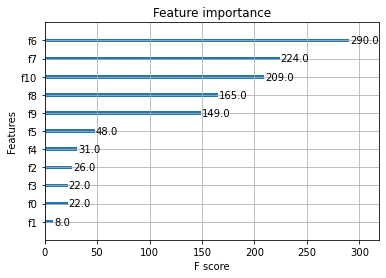

In [19]:
xgboost.plot_importance(xgb_model[1])

xgb모델의 특징인, xgb 모델의 중요변수 그래프를 표시 가능하다.

일반적인 사용법은
xgboost.plot_importance(xgb_model)이지만,
현재 모델은 파이프라인으로 사용중이기에 해당 방법 xgb_model위치를 지정받아야 그릴 수 있다.


In [20]:
# 결정계수 확인.
print(f'train셋의 결정계수 : {xgb_model.score(X_train, y_train)}')
print(f'valid셋의 결정계수 : {xgb_model.score(X_valid, y_valid)}')


# 결정계수 맞는지 따로 확인. mse, 설명분산비율 확인.
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score
y_valid_pred = xgb_model.predict(X_valid).reshape(-1,1)

print(f'valid셋의 결정계수_r2_score로 확인. : {r2_score(y_valid, y_valid_pred)}')
print(f'valid셋의 표준화된 MSE. : {mean_squared_error(y_valid, y_valid_pred)}')
print(f'valid셋의 MSE. : {mean_squared_error(y_scaling.inverse_transform(y_valid), y_scaling.inverse_transform(y_valid_pred))}')
print(f'valid셋의 RMSE. : {math.sqrt(mean_squared_error(y_scaling.inverse_transform(y_valid), y_scaling.inverse_transform(y_valid_pred)))}')
print(f'valid셋의 분산 설명비율. : {explained_variance_score(y_valid_pred,y_valid)}')


# 테스트셋에 대해서 예측한다면 이렇게 된다.
test_pred = xgb_model.predict(test).reshape(-1,1)

# 다시 원래대로 돌려준다면? 이렇게 된다.
# y_scaling.inverse_transform(test_pred)

train셋의 결정계수 : 0.9999989222489813
valid셋의 결정계수 : 0.8030914165845888
valid셋의 결정계수_r2_score로 확인. : 0.8030914165845888
valid셋의 표준화된 MSE. : 0.17231196683560004
valid셋의 MSE. : 104386.20686103209
valid셋의 RMSE. : 323.0885433763198
valid셋의 분산 설명비율. : 0.8009183420470298


과적합이 된것으로 보인다.
테스트셋의 결정계수에 비해 valid셋의 결정계수가 작은것을 확인
RMSE가 선형모델보다 크게 나오는 경향을 보이고 있다.
gridsearch를 통해 모델의 향상을 시도해 보겠다.

In [21]:
# GridSearch 해보자.
from sklearn.model_selection import KFold, GridSearchCV

kfold = KFold(n_splits=10, shuffle = True) # shuffle=True로 매 k-fold의 편향을 없애준다. 층화가 필요하면 StratifiedKFold 사용할것.
params = {
         'XGB_Reg__learning_rate': [0.5, 0.2, 0.1, 0.05], #so called `eta` value  
         'XGB_Reg__max_depth': [2, 3, 4],
         'XGB_Reg__gamma': [0.1, 0.5, 1],
         'XGB_Reg__subsample': [0.5, 0.6, 0.7],
         'XGB_Reg__colsample_bytree': [0.6, 0.8, 1.0],
         'XGB_Reg__n_estimators': [10,50,100,200]
}
# 내 임의대로 배치한거임. 아래 기준보고 계속 조정 필요.

grid = GridSearchCV(estimator= xgb_model, param_grid = params, scoring= 'neg_root_mean_squared_error', cv = kfold, n_jobs=4)
# n_jobs = 작업 cpu개수-> 4코어 노트북에서 작업함. verbose - 작업 상황 표시
# cv=k-fold 개수. 매개변수 이용위해 따로 지정하였음. scoring = 여러 변수 참조. 사실 잘 모르겠음. mse, mae, acc, r2 등등 있는데 종류 잘 모름.

grid.fit(X_train, y_train)
# 훈련이 안되는 에러를 발견했는데 =>  Check the list of available parameters with `estimator.get_params().keys()`. 에러.
# grid.get_params().keys()해서 나오는 변수가 params가 된다. pipeline을 사용하면서 변화한 변수명이 문제임.
# estimator__XGB_Reg__n_estimators로 나왔다면 'estimator__' 부분은 떼고 'XGB_Reg__n_estimators'만 사용.

print(f'최적의 하이퍼 파라미터 : {grid.best_params_}'); print(f'최적의 모델 평균 성능 : {grid.best_score_}')

# 그리드 서치 된 결과, 결정계수.
npred = grid.predict(X_valid).reshape(-1,1)
print(f'valid셋의 결정계수. : {r2_score(y_valid, npred)}')
print(f'valid셋의 MSE. : {mean_squared_error(y_scaling.inverse_transform(y_valid), y_scaling.inverse_transform(npred))}')
print(f'valid셋의 RMSE. : {math.sqrt(mean_squared_error(y_scaling.inverse_transform(y_valid), y_scaling.inverse_transform(npred)))}')


최적의 하이퍼 파라미터 : {'XGB_Reg__colsample_bytree': 0.8, 'XGB_Reg__gamma': 1, 'XGB_Reg__learning_rate': 0.1, 'XGB_Reg__max_depth': 3, 'XGB_Reg__n_estimators': 200, 'XGB_Reg__subsample': 0.5}
최적의 모델 평균 성능 : -0.4321185965333039
valid셋의 결정계수. : 0.8659422190242869
valid셋의 MSE. : 71067.40545786722
valid셋의 RMSE. : 266.5847059714177


파라미터 조정을 세부적으로 해보지 못했지만, 개선이 잘 이뤄지지 않았다.(선형회귀만큼 감소하지는 못함)
최초 모델선정시 성능이 우수한 모델을 대상으로 파라미터 조정을 시도하는것이 올바르겠다는 판단을 하게 되었다.

# 그외 찾아볼만한, 부스팅 모델
from catboost import CatBoostRegressor
-> 자체적으로 시계열을 형성함. 범주형이 많을때 유효한 성능 등장, 결측이 있으면 민감하게 반응.
-> 하이퍼파라미터 조정이 불필요한편


In [28]:
from catboost import CatBoostRegressor

cat_model = Pipeline([
    ('scaleing', ColumnScaleing),
    ('XGB_Reg', CatBoostRegressor(verbose=0))
])

cat_model.fit(X_train,y_train)

train_pred = cat_model.predict(X_train).reshape(-1,1)
val_pred = cat_model.predict(X_valid).reshape(-1,1)

# score check
print(f'train셋의 스코어 : {cat_model.score(X_train, y_train)}')
print(f'valid셋의 스코어 : {cat_model.score(X_valid, y_valid)}')
# r2_score로 다시체크
print(f'train셋의 결정계수 : {r2_score(y_train, train_pred)}')
print(f'valid셋의 결정계수 : {r2_score(y_valid, val_pred)}')


train셋의 스코어 : -179.30022114691397
valid셋의 스코어 : -44.74107485860086
train셋의 결정계수 : 0.9988598271554997
valid셋의 결정계수 : 0.7877608333707691


XGBoost와 동일하게 train셋에 과적합 발생으로 valid셋에 대해 추정을 못하는 결과를 나타내는것을 확인하였습니다.
catboost는 파라미터 조정이 약간 무의미한 경향도 존재하여 향상 가능성이 낮아 진행하지 않았습니다.


# 그외 찾아볼만한, 부스팅 모델

from sklearn.ensemble import AdaBoostRegressor


시간이 오래걸리는데 RandomizedSearchCV를 쓰는건 어떨까? 그리드서치와 유사한 성능을 보이는것으로 알려져 있으며, 사용법을 공부해 보는것이 좋아보인다.

# 랜덤 포레스트 모델

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


rforest_model = Pipeline([
    ('scaleing', ColumnScaleing),
    ('rforest_Reg', RandomForestRegressor())
])


rforest_model.fit(X_train,y_train)

# 결정계수 확인.
rforest_model.score(X_train, y_train)
rforest_model.score(X_valid, y_valid)

# 결정계수 맞는지 따로 확인. mse, 설명분산비율 확인.
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score
y_valid_pred = rforest_model.predict(X_valid).reshape(-1,1)

print(f'valid셋의 결정계수. : {r2_score(y_valid, y_valid_pred)}')
print(f'valid셋의 표준화된 MSE. : {mean_squared_error(y_valid, y_valid_pred)}')
print(f'valid셋의 MSE. : {mean_squared_error(y_scaling.inverse_transform(y_valid), y_scaling.inverse_transform(y_valid_pred))}')
print(f'valid셋의 RMSE. : {math.sqrt(mean_squared_error(y_scaling.inverse_transform(y_valid), y_scaling.inverse_transform(y_valid_pred)))}')

mean_squared_error(y_valid, y_valid_pred)
explained_variance_score(y_valid_pred,y_valid) # R^2과 같다고 알려져 있지만, 다름. 왜?

# 테스트셋에 대해서 예측한다면 이렇게 된다.
test_pred = rforest_model.predict(test).reshape(-1, 1)

# 다시 원래대로 돌려준다면? 이렇게 된다.
# y_scaling.inverse_transform(test_pred)

valid셋의 결정계수. : 0.8529335154157139
valid셋의 표준화된 MSE. : 0.1286958383162713
valid셋의 MSE. : 77963.65489130432
valid셋의 RMSE. : 279.2197251114332


C:\Users\styli\anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [23]:
# grid_search

kfold = KFold(n_splits=10, shuffle = True) # shuffle=True로 매 k-fold의 편향을 없애준다. 층화가 필요하면 StratifiedKFold 사용할것.
params = { 'rforest_Reg__n_estimators' : [10, 50,100],
           'rforest_Reg__max_depth' : [6, 12, 18, 24],
           'rforest_Reg__min_samples_leaf' : [1, 6, 12, 18],
           'rforest_Reg__min_samples_split' : [2, 8, 16, 20]
            }
grid2 = GridSearchCV(estimator= rforest_model, param_grid = params, scoring= 'neg_root_mean_squared_error', cv = kfold, n_jobs=4)

grid2.fit(X_train, np.ravel(y_train))
# 너는 왜 np.ravel 써야하는지 잘 모르겠음. => 1차원 변환 함수. reshape(-1,1)는 통하지 않음.
# XGboost에서는 np (변수수,1)형으로 넣으면 따로 요구하지도 않았는데? 얘는 따로 평탄화도 해야함.
# 안쓰면 A column-vector y was passed when a 1d array was expected 에러 등장함.

print(f'최적의 하이퍼 파라미터 : {grid.best_params_}'); print(f'최적의 모델 평균 성능 : {grid.best_score_}')

# 그리드 서치 된 결과, 결정계수.
npred = grid2.predict(X_valid).reshape(-1, 1)
print(f'valid셋의 결정계수. : {r2_score(y_valid, npred)}')
print(f'valid셋의 MSE. : {mean_squared_error(y_scaling.inverse_transform(y_valid), y_scaling.inverse_transform(npred))}')
print(f'valid셋의 RMSE. : {math.sqrt(mean_squared_error(y_scaling.inverse_transform(y_valid), y_scaling.inverse_transform(npred)))}')



최적의 하이퍼 파라미터 : {'XGB_Reg__colsample_bytree': 0.8, 'XGB_Reg__gamma': 1, 'XGB_Reg__learning_rate': 0.1, 'XGB_Reg__max_depth': 3, 'XGB_Reg__n_estimators': 200, 'XGB_Reg__subsample': 0.5}
최적의 모델 평균 성능 : -0.4321185965333039
valid셋의 결정계수. : 0.8559432277389246
valid셋의 MSE. : 76368.13043478261
valid셋의 RMSE. : 276.34784318822284


특이하게도, 해당 데이터셋에는 선형모델이 가장 우수한 성능을 보이고 있다.
다양하게 시드를 바꿔서 시도해 보고 일관적인 결과를 보이는지 테스트해볼 필요성이 있을것 같다.


뭔가 더 해보고 싶은 모듈들.

앙상블 모델.(나무 기반.)

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import ExtraTreesRegressor

이 두개의 모듈을 더 사용해 보고 싶다는 생각을 해보았다.
